# Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import demoji
from unidecode import unidecode
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer

import os
import modin.pandas as mpd
import ray


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [2]:
## Model
# Loading some sklearn packaces for modelling.
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# for build our model
import tensorflow as tf
import tensorflow_hub as hub
import tokenization
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=False)

# Setting some options for general use.
import os
import warnings
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

2022-01-21 23:05:35.247502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-21 23:05:35.247535: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-21 23:05:37.073873: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-21 23:05:37.073933: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hazem): /proc/driver/nvidia/version does not exist
2022-01-21 23:05:37.074541: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F 

In [2]:
df = pd.read_csv('All_Data.csv')

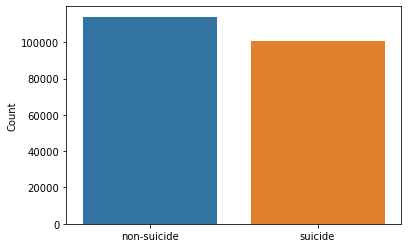

In [3]:
sns.barplot(x=df['sentiment'].value_counts().index.values, y=df['sentiment'].value_counts())
plt.ylabel('Count')
plt.show()

In [4]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['URL_HTML_unemoji_reduce_corr'])

In [5]:
word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)

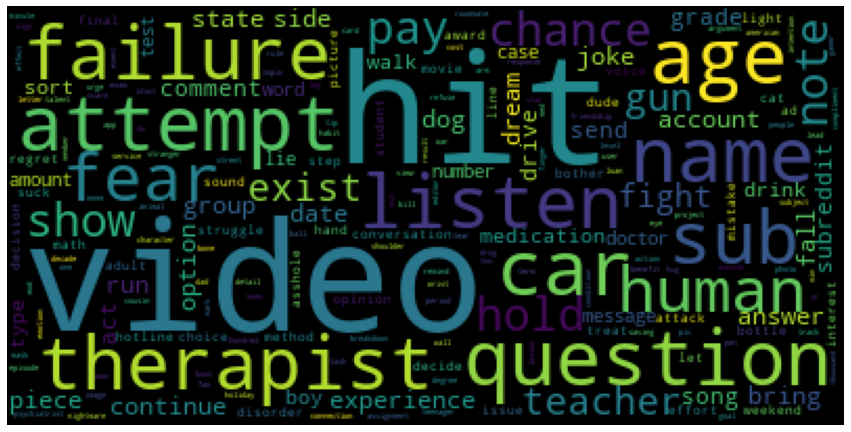

In [6]:
feature_names=word_freq['word'].values
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wc)

# Methods 

## Emoji

In [3]:
EMOTICONS = {
    u":‑\)":"Happy face",u":\)":"Happy face",    u":-\]":"Happy face",u":\]":"Happy face",    u":-3":"Happy face",    u":3":"Happy face",    u":->":"Happy face",u":>":"Happy face",    u"8-\)":"Happy face",    u":o\)":"Happy face",    u":-\}":"Happy face",u":\}":"Happy face",    u":-\)":"Happy face",    u":c\)":"Happy face",    u":\^\)":"Happy face",u"=\]":"Happy face",    u"=\)":"Happy face",    u":‑D":"Laughing",u":D":"Laughing",    u"8‑D":"Laughing",u"8D":"Laughing",    u"X‑D":"Laughing",u"XD":"Laughing",    u"=D":"Laughing",u"=3":"Laughing",    u"B\^D":"Laughing",u":-\)\)":"Very happy",    u":‑\(":"sad",u":-\(":"sad",    u":\(":"sad",u":‑c":"sad",    u":c":"sad",u":‑<":"sad",    u":<":"sad",u":‑\[":"sad",    u":\[":"sad",u":-\|\|":"sad",    u">:\[":"sad",u":\{":"sad",    u":@":"sad",u">:\(":"sad",    u":'‑\(":"Crying",u":'\(":"Crying",    u":'‑\)":"Tears of happiness",u":'\)":"Tears of happiness",    u"D‑':":"Horror",u"D:<":"Disgust",    u"D:":"Sadness",u"D8":"Great dismay",    u"D;":"Great dismay",    u"D=":"Great dismay",    u"DX":"Great dismay",u":‑O":"Surprise",    u":O":"Surprise",    u":‑o":"Surprise",    u":o":"Surprise",u":-0":"Shock",    u"8‑0":"Yawn",    u">:O":"Yawn",    u":-\*":"Kiss",u":\*":"Kiss",    u":X":"Kiss",    u";‑\)":"Wink",u";\)":"Wink",    u"\*-\)":"Wink",u"\*\)":"Wink",    u";‑\]":"Wink",u";\]":"Wink",    u";\^\)":"Wink",u":‑,":"Wink",    u";D":"Wink",u":‑P":"Tongue sticking out",u":P":"Tongue sticking out",u"X‑P":"Tongue sticking out",u"XP":"Tongue sticking out",u":‑Þ":"Tongue sticking out",u":Þ":"Tongue sticking out",u":b":"Tongue sticking out",u"d:":"Tongue sticking out",u"=p":"Tongue sticking out",u">:P":"Tongue sticking out",u":‑/":"annoyed",u":/":"annoyed",u":-[.]":"annoyed",u">:[(\\\)]":"annoyed",u">:/":"annoyed",u":[(\\\)]":"annoyed",u"=/":"annoyed",u"=[(\\\)]":"annoyed",u":L":"annoyed",u"=L":"annoyed",u":S":"annoyed",u":‑\|":"Straight face",u":\|":"Straight face",u":$":"Embarrassed",u":‑x":"tongue-tied",u":x":"tongue-tied",u":‑#":"tongue-tied",u":#":"tongue-tied",u":‑&":"tongue-tied",u":&":"tongue-tied",u"O:‑\)":"innocent",u"O:\)":"innocent",u"0:‑3":"innocent",u"0:3":"innocent",u"0:‑\)":"innocent",u"0:\)":"innocent",u":‑b":"Tongue sticking out",u"0;\^\)":"innocent",u">:‑\)":"Evil",u">:\)":"Evil",u"\}:‑\)":"Evil",u"\}:\)":"Evil",u"3:‑\)":"Evil",u"3:\)":"Evil",u">;\)":"Evil",u"\|;‑\)":"Cool",u"\|‑O":"Bored",u":‑J":"Tongue-in-cheek",u"#‑\)":"Party all night",u"%‑\)":"confused",u"%\)":"confused",u":-###..":"Being sick",u":###..":"Being sick",u"<:‑\|":"Dump",u"\(>_<\)":"Troubled",u"\(>_<\)>":"Troubled",u"\(';'\)":"Baby",u"\(\^\^>``":"Nervous",u"\(\^_\^;\)":"Nervous",u"\(-_-;\)":"Nervous",u"\(~_~;\) \(・\.・;\)":"Nervous",u"\(-_-\)zzz":"Sleeping",u"\(\^_-\)":"Wink",u"\(\(\+_\+\)\)":"Confused",u"\(\+o\+\)":"Confused",u"\(o\|o\)":"Ultraman",u"\^_\^":"Joyful",u"\(\^_\^\)/":"Joyful",u"\(\^O\^\)／":"Joyful",u"\(\^o\^\)／":"Joyful",u"\(__\)":"respect",u"_\(\._\.\)_":"respect",u"<\(_ _\)>":"respect",u"<m\(__\)m>":"respect",u"m\(__\)m":"respect",u"m\(_ _\)m":"respect",u"\('_'\)":"Sad",u"\(/_;\)":"Sad",u"\(T_T\) \(;_;\)":"Sad",u"\(;_;":"Sad of Crying",u"\(;_:\)":"Sad",u"\(;O;\)":"Sad",u"\(:_;\)":"Sad",u"\(ToT\)":"Sad",u";_;":"Sad",u";-;":"Sad",u";n;":"Sad",u";;":"Sad",u"Q\.Q":"Sad",u"T\.T":"Sad",u"QQ":"Sad",u"Q_Q":"Sad",u"\(-\.-\)":"Shame",u"\(-_-\)":"Shame",u"\(一一\)":"Shame",u"\(；一_一\)":"Shame",u"\(=_=\)":"Tired",u"\(=\^\·\^=\)":"cat",u"\(=\^\·\·\^=\)":"cat",u"=_\^=":"cat",u"\(\.\.\)":"Looking down",u"\(\._\.\)":"Looking down",u"\^m\^":"Giggling with hand covering mouth",u"\(\・\・?":"Confusion",u">\^_\^<":"Normal Laugh",u"<\^!\^>":"Normal Laugh",u"\^/\^":"Normal Laugh",u"\（\*\^_\^\*）" :"Normal Laugh",u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",u"\(^\^\)":"Normal Laugh",u"\(\^\.\^\)":"Normal Laugh",u"\(\^_\^\.\)":"Normal Laugh",u"\(\^_\^\)":"Normal Laugh",u"\(\^\^\)":"Normal Laugh",u"\(\^J\^\)":"Normal Laugh",u"\(\*\^\.\^\*\)":"Normal Laugh",u"\(\^—\^\）":"Normal Laugh",u"\(#\^\.\^#\)":"Normal Laugh",u"\（\^—\^\）":"Waving",u"\(;_;\)/~~~":"Waving",u"\(\^\.\^\)/~~~":"Waving",u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",u"\(T_T\)/~~~":"Waving",u"\(ToT\)/~~~":"Waving",u"\(\*\^0\^\*\)":"Excited",u"\(\*_\*\)":"Amazed",u"\(\*_\*;":"Amazed",u"\(\+_\+\) \(@_@\)":"Amazed",u"\(\*\^\^\)v":"Laughing",u"\(\^_\^\)v":"Laughing",u"\(\(d[-_-]b\)\)":"Listening to music",u'\(-"-\)':"Worried",u"\(ーー;\)":"Worried",u"\(\^0_0\^\)":"Eyeglasses",u"\(\＾ｖ\＾\)":"Happy",u"\(\＾ｕ\＾\)":"Happy",u"\(\^\)o\(\^\)":"Happy",u"\(\^O\^\)":"Happy",u"\(\^o\^\)":"Happy",u"\)\^o\^\(":"Happy",u":O o_O":"Surprised",u"o_0":"Surprised",u"o\.O":"Surpised",u"\(o\.o\)":"Surprised",u"oO":"Surprised",u"\(\*￣m￣\)":"Dissatisfied",u"\(‘A`\)":"Snubbed"
}

In [4]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


### Remove Emoji

In [5]:
def remove_emoji(tweet):
    emoji = demoji.findall(tweet)
    
    result = ''
    result1 = ''
    for emot in EMOTICONS:
        tweet = re.sub(u'('+emot+')', " ", tweet)    
    for char in tweet:        
        if (len(emoji.get(char, char)) <= 1):
            result += emoji.get(char, char)

    result = emoji_pattern.sub(r'', result)     #remove emojis escapped from tweet    
    

    return result


### Transfer HTML code (&lt;) to < , &amp; to & and .......

In [6]:
def Replace_HTML_codes(text):
    from xml.sax import saxutils as su
    result = su.unescape(text)
    return result

### Remove numbers

In [7]:
def remove_num(text):
    text = re.sub(" \d+", " ", text)
    return text

### Spell Checker


In [8]:
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spellings(text):
    text = text.replace("."," ");
    text = unidecode(text)  # Replcae unascii
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)


### Remove URL (http://ssdfsd ) and @username and change & to and

In [9]:
def Remove_Url_UserName(text): 
    text = re.sub(r"http\S+", "", text , re.IGNORECASE)         #remove url links
    text = re.sub("www.[A-Za-z0-9./]+", ' ', text,re.IGNORECASE)        #remove url links
    text = re.sub('@[^\s]+', ' ', text)     #remove user name
    text = text.replace("&", " and ")       # change & to meaning of sentence
#     text = text.replace("%", " percentage ")       # change & to persentage 
    
    text = re.sub('\n', ' ', text)          #convert to one line only 
    text = re.sub(' +', ' ', text)          #convert two or more spaces into one space
    return text


## Remove 
* Names  
* StopWords
* punct

### Custom stop word

* refer to "https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html "

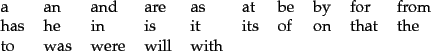

In [10]:
custom_stop_word_list=['a','an','are','as','at','by','for','from','if','her','i','me', 'he','him','she', 'himself','they',
                       'you','yours', 'yourselves','themselves','their', 'hereupon','wherein', 'upon',
                       'in','on','onto', 'it','its','of','on','that','the','to','this', 'with','thereafter', 'thence','these',
                       'there', 'sometime','here',  'ourselves', 'when','where','what','whoever',  'whom', 'while','why',
                       'whose', 'whatever','whereas','whenever',  'with', 'who', 'how', 'whither', 'does', 'due',
                       'wherever', 'across', 'somewhere', 'my','mine',  'though', 'itself', 'whence', 'might', 'might', 'we',
                       'as','per', 'whereby', 'since', 'during', 'would', 'such', 'those','which', 'thereby', 'amount', 'at',
                       'into', 'otherwise', 'whether','somehow', 'hence', 'something', 'because', 'meanwhile', 'should', 
                       'still', 'also', 'and','else', 'along', 'another','thru',  'via', 'so', 'after', 
                       'before','may',  'about', 'namely', 'seeming', 'hereby', 'then', 'thereupon','whereafter', 'of', 'to',
                       
                       ## May effect 
                       #'have', 'becoming', 
                        'is','am','be', 'were','was','be','could','being', 'has','are', 
                       'been', 'his',  'us', 'herself',  'do', 'doing', 'both','did', 'had', 
                       ]

In [11]:
contractions = {
"ain't": "are not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how has","i'd": "I would","i'd've": "I would have","i'll": "I will","i'll've": "I will have","i'm": "I am","i've": "I have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is","that'd": "that had","that'd've": "that would have","that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we had","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who has","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you had / you would","you'd've": "you would have","you'll": "you shall / you will","you'll've": "you shall have / you will have","you're": "you are","you've": "you have"
}

In [12]:
def StopWords_punct(text):
    # Remove stop words , punct 
    texts = "Issue in Process "
    text = unidecode(text)  # Replcae unascii
    text = re.sub(' +', ' ', text)          #convert two or more spaces into one space
                                            #     text_ = Remove_Url_UserName_digits_ConnectLines_ReduceSpaces(text)
    texts = text
    texts = re.sub(' +', ' ', texts)          #convert spaces to one space as names removed 
    
    words = nltk.word_tokenize(texts)
    new_words= [word for word in words if word.isalnum()]


    my_doc_cleaned= [word for word in new_words if word not in custom_stop_word_list]
     
    return my_doc_cleaned


## Merge Functions

# Steps


* Steps without EMOJI

In [13]:
def preprocess_text_removeEmoji(text):
    text = Remove_Url_UserName(text)
    t2 = Replace_HTML_codes(text)
    t3 = remove_emoji(t2)
    t4 = correct_spellings(t3)
    t5 = StopWords_punct(t4)

    text = ' '.join(str(v) for v in t5)
    return text

# Testing Functions

### applying preprocessing :-
### @neonwonderland somebodye on yt youtube made an mp3 version of each song from the coachella set!!! ;D :) using my cmputr http://www.megaupload.com/?d=EBUP6VVO$#@see go

In [14]:
te = "@neonwonderland somebodye on yt youtube made an mp3 version of each song from the coachella set!!! ;D :) using my cmputr http://www.megaupload.com/?d=EBUP6VVO$#@see go"
Text2 = preprocess_text_removeEmoji(te)
print(Text2)


somebody youtube made version each song coachella set using computer go


# Reading Data 

# ===============================================

In [15]:
os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
ray.init(num_cpus=4)                # access all cores in CPU



{'node_ip_address': '10.0.0.5',
 'raylet_ip_address': '10.0.0.5',
 'redis_address': '10.0.0.5:6379',
 'object_store_address': '/tmp/ray/session_2022-01-21_23-05-58_926312_18961/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2022-01-21_23-05-58_926312_18961/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2022-01-21_23-05-58_926312_18961',
 'metrics_export_port': 50260,
 'node_id': 'd3716e1952be101e3abdd7db5856fe005a2136e9ed7d7fb13b0f3b40'}

In [16]:
data = mpd.read_csv(r"Suicide_Detection.csv" ,header=0, encoding='latin-1' ,  
                  names =["id","content","sentiment"])
data = data[["sentiment" , "content"]]

In [17]:
data.head()

,sentiment,content
0,suicide,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen."
1,non-suicide,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it
2,non-suicide,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying"
3,suicide,i need helpjust help me im crying so hard
4,suicide,"Iâm so lostHello, my name is Adam (16) and Iâve been struggling for years and Iâm afraid. Through these past years thoughts of suicide, fear, anxiety Iâm so close to my limit . Iâve been quiet for so long and Iâm too scared to come out to my family about these feelings. About 3 years ago losing my aunt triggered it all. Everyday feeling hopeless , lost, guilty, and remorseful over her and all the things Iâve done in my life,but thoughts like these with the little Iâve experienced in life? Only time Iâve revealed these feelings to my family is when I broke down where they saw my cuts. Watching them get so worried over something I portrayed as an average day made me feel absolutely dreadful. They later found out I was an attempt survivor from attempt OD(overdose from pills) and attempt hanging. All that happened was a blackout from the pills and I never went through with the noose because Iâm still so afraid. During my first therapy I was diagnosed with severe depression, social anxiety, and a eating disorder.\nI was later transferred to a fucken group therapy for some reason which made me feel more anxious. Eventually before my last session with a 1 on 1 therapy she showed me my results from a daily check up on my feelings(which was a 2 - step survey for me and my mom/dad )\nCome to find out as Iâve been putting feeling horrible and afraid/anxious everyday , my mom has been doing Iâve been doing absolutely amazing with me described as âhappiest sheâs ever seen me, therapy has helped himâ \nI eventually was put on Sertaline (anti anxiety or anti depression Iâm sorry I forgot) but I never finished my first prescription nor ever found the right type of anti depressant because my mom thought I only wanted the drugs so she took me off my recommended pill schedule after ~3 week and stopped me from taking them. All this time Iâve been feeling worse afraid of the damage/ worry Iâve caused them even more. \nNow here with everything going on, Iâm as afraid as Iâve ever been . Iâve relapsed on cutting and have developed severe insomnia . Day after day feeling more hopeless, worthless questioning why am I still here? Whatâs my motivation to move out of bed and keep going? I ask these to myself nearly every night almost having a break down everytime. \nPlease Please Please someone.. anyone help me.\nIâm so scared I might do something drastic, Iâve been shaped by fear and anxiety. Idk what to do anymore"


In [18]:
data.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ---------  ---------------  ----- 
 0   sentiment  232074 non-null  object
 1   content    232074 non-null  object
dtypes: object(2)
memory usage: 3.5 MB


In [19]:
data['sentiment'].value_counts()

non-suicide    116037
suicide        116037
Name: sentiment, dtype: int64

In [20]:
data['length']=data['content'].str.len()
data=data[data['length']<2000]
data = data[["sentiment" , "content"]]
data.info()

<class 'modin.pandas.dataframe.DataFrame'>
Int64Index: 214799 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ---------  ---------------  ----- 
 0   sentiment  214799 non-null  object
 1   content    214799 non-null  object
dtypes: object(2)
memory usage: 4.9 MB


In [21]:
data['sentiment'].value_counts()

non-suicide    114085
suicide        100714
Name: sentiment, dtype: int64

# Apply Preprocessing 

In [24]:
def forAll(df_data):

    df_data['URL_HTML_unemoji']=df_data['content'].apply(Remove_Url_UserName).apply(Replace_HTML_codes).apply(remove_emoji)
    df_data['URL_HTML_unemoji_corr']=df_data['URL_HTML_unemoji'].apply(correct_spellings)
    df_data['URL_HTML_unemoji_corr_Num']=df_data['URL_HTML_unemoji'].apply(remove_num)
    df_data['URL_HTML_unemoji_reduce_corr']=df_data['URL_HTML_unemoji_corr_Num'].apply(StopWords_punct)
    
    # df_data.to_csv('All_Data.csv', encoding='latin-1', index=False)
    return df_data
PreProcess_data = forAll(data)  

In [26]:
PreProcess_data.head()

,sentiment,content,URL_HTML_unemoji,URL_HTML_unemoji_corr,URL_HTML_unemoji_corr_Num,URL_HTML_unemoji_reduce_corr
21,non-suicide,"Me: I know I have a really toxic house and I do my best to cope with with it by going to school, etc Rona: hahahaha, stay at home forcefully go brrrrrrrrr","Me: I know I have a really toxic house and I do my best to cope with with it by going to school, etc Rona: hahahaha, stay at home forcefully go brrrrrrrrr",Me: I know I have a really toxic house and I do my best to cope with with it by going to school etc Rona: hahahaha stay at home forcefully go brrrrrrrrr,"Me: I know I have a really toxic house and I do my best to cope with with it by going to school, etc Rona: hahahaha, stay at home forcefully go brrrrrrrrr","[Me, I, know, I, have, really, toxic, house, I, best, cope, going, school, etc, Rona, hahahaha, stay, home, forcefully, go, brrrrrrrrr]"
24,non-suicide,"Do you sleep with Socks On,and how do you feel about sleeping with socks on? (I tried it for the first time with heavy long socks and it felt really nice when I woke up) Here are some benefits according to Healthline \n \n\n* **Prevent hot flashes:** Some women find wearing socks helpful for cooling their core body temperature.\n* **Improve cracked heels:** Wearing cotton socks after you moisturize can help keep your heels from drying out.\n* **Increase potential orgasms: According to the** [**BBC**](https://news.bbc.co.uk/2/hi/health/4111360.stm)**, researchers accidentally discovered that wearing socks increased participantsâ ability to achieve an orgasm by 30 percent.**\n* **Decrease chance of Raynaudâs attack:** Raynaudâs disease is when affected areas of the skin, usually the toes and fingers, lose circulation and start to throb or swell. Wearing socks at night can help prevent an attack by keeping your feet warm and blood circulating.","Do you sleep with Socks On,and how do you feel about sleeping with socks on? (I tried it for the first time with heavy long socks and it felt really nice when I woke up) Here are some benefits according to Healthline * **Prevent hot flashes * Some women find wearing socks helpful for cooling their core body temperature. * **Improve cracked heels * Wearing cotton socks after you moisturize can help keep your heels from drying out. * **Increase potential orgasms: According to the** [**BBC**]( researchers accidentally discovered that wearing socks increased participantsâ ability to achieve an orgasm by 30 percent.** * **Decrease chance of Raynaudâs attack * Raynaudâs disease is when affected areas of the skin, usually the toes and fingers, lose circulation and start to throb or swell. Wearing socks at night can help prevent an attack by keeping your feet warm and blood circulating.","Do you sleep with Socks On,and how do you feel about sleeping with socks on (I tried it for the first time with heavy long socks and it felt really nice when I woke up Here are some benefits according to Healthline * **Prevent hot flashes * Some women find wearing socks helpful for cooling their core body temperature * **Improve cracked heels * Wearing cotton socks after you moisturize can help keep your heels from drying out * **Increase potential orgasms According to the [**BBC**]( researchers accidentally discovered that wearing socks increased participants ability to achieve an orgasm by 30 percent i * **Decrease chance of Raynaudas attack * Raynaudas disease is when affected areas of the skin usually the toes and fingers lose circulation and start to throb or swell Wearing socks at night can help prevent an attack by keeping your feet warm and blood circulating","Do you sleep with Socks On,and how do you feel about sleeping with socks on? (I tried it for the first time with heavy long socks and it felt really nice when I woke up) Here are some benefits according to Healthline * **Prevent hot flashes * Some women find wearing socks helpful for cooling their core body temperature. * **Improve cracked heels * 

# Model

In [1]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-01-16 08:24:45.562953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 08:24:45.563484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 08:24:45.563907: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 08:24:45.564428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 08:24:45.565656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [4]:
df = pd.read_csv('https://transfer.sh/azv2wW/All_Data.csv')

In [6]:
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
        df['URL_HTML_unemoji_reduce_corr'], df['sentiment'], test_size=0.2, stratify=df['sentiment'], random_state=42
    )

In [9]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

def bert_encode(texts, tokenizer=tokenizer, max_len=128):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [10]:
def bert_encode_predict(text, tokenizer=tokenizer, max_len=128):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    
    text = tokenizer.tokenize(text)

    text = text[:max_len-2]
    input_sequence = ["[CLS]"] + text + ["[SEP]"]
    pad_len = max_len - len(input_sequence)

    tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
    pad_masks = [1] * len(input_sequence) + [0] * pad_len
    segment_ids = [0] * max_len

    all_tokens.append(tokens)
    all_masks.append(pad_masks)
    all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [11]:
X_train = bert_encode(X_train, tokenizer)

In [12]:
def build_model(bert_layer, max_len=128):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(1, activation='sigmoid')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [13]:
model = build_model(bert_layer)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

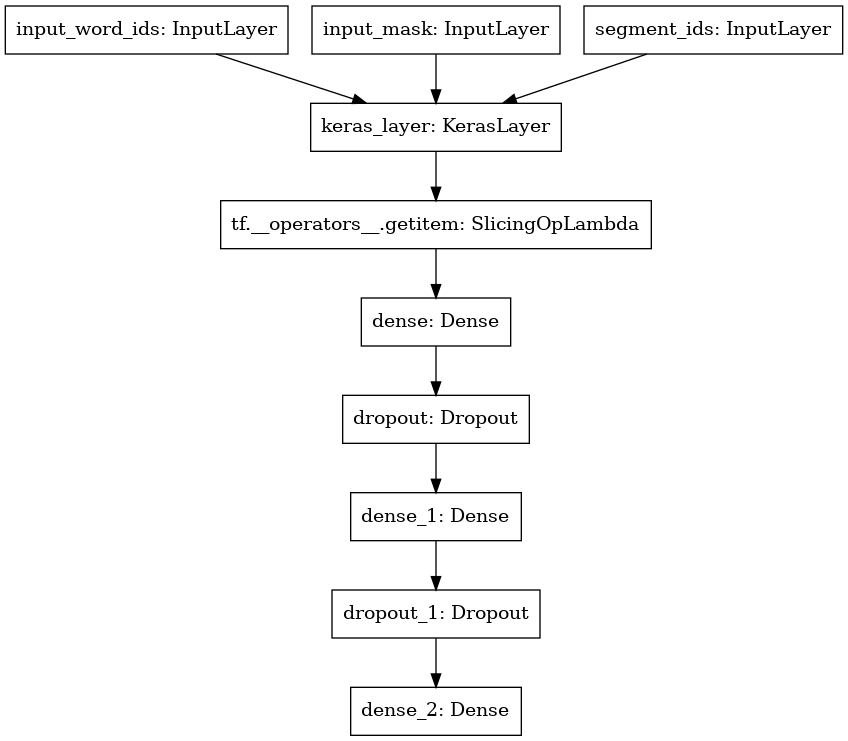

In [15]:
tf.keras.utils.plot_model(model)

In [16]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/best_weights',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=16, callbacks=[model_checkpoint_callback])

2022-01-16 08:30:36.329827: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9666/9666 [==============================] - 972s 100ms/step - loss: 0.3915 - accuracy: 0.8304 - val_loss: 0.2694 - val_accuracy: 0.8908
Epoch 2/10
9666/9666 [==============================] - 964s 100ms/step - loss: 0.2779 - accuracy: 0.8912 - val_loss: 0.2423 - val_accuracy: 0.9042
Epoch 3/10
9666/9666 [==============================] - 964s 100ms/step - loss: 0.2556 - accuracy: 0.9012 - val_loss: 0.2306 - val_accuracy: 0.9093
Epoch 4/10
9666/9666 [==============================] - 965s 100ms/step - loss: 0.2440 - accuracy: 0.9065 - val_loss: 0.2238 - val_accuracy: 0.9122
Epoch 5/10
9666/9666 [==============================] - 904s 94ms/step - loss: 0.2361 - accuracy: 0.9093 - val_loss: 0.2189 - val_accuracy: 0.9144
Epoch 6/10
9666/9666 [==============================] - 959s 99ms/step - loss: 0.2303 - accuracy: 0.9113 - val_loss: 0.2152 - val_accuracy: 0.9160
Epoch 7/10
9666/9666 [==============================] - 960s 99ms/step - loss: 0.2255 - accuracy: 0.9134 - val_los

In [18]:
# X_test = bert_encode(X_test, tokenizer)

In [19]:
# model.evaluate(X_test, y_test)

In [20]:
model.save('./my_model')

2022-01-16 11:10:46.448564: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


# ===================================================

# Future Plans 

## Texts
* 
### some issue 
* Hashtag may have more importance 
* image if can get it and describe in it 
* remove names can do that for english name in space



### Reduce Words (diseases , drugs , feelingwords ) getting from dir dictionaries

In [17]:
file ='dictionaries/diseases.txt'
All_diseases = []
with open(file) as f:
    line = f.readline()
    while line:
        line = f.readline().strip('\n')
        if len(line) > 0 :
            All_diseases.append(line)


In [19]:
file ='dictionaries/drugs.txt'
All_drugs = {}
with open(file) as f:
    drugs_name = "Stimulant notable stimulants"
    line = f.readline()
    while line:
        line = f.readline().strip('\n')
        if len(line) > 0 and line[0]!= '#':
            All_drugs[line] = drugs_name
        
        elif len(line) > 0 :
            text = line.split('/')    
            drugs_name = text[-1]


In [20]:
file ='dictionaries/feelingwords_mapping.txt'
All_feelings = {}
with open(file) as f:
    line = f.readline()
    while line:
        line = f.readline().strip('\n')
        text = line.split('\t')
        if len(line) > 0 :
                All_feelings[text[-1]] = text[0]


In [21]:
file ='dictionaries/meds.txt'
All_meds = []
with open(file) as f:
    line = f.readline()
    while line:
        line = f.readline().strip('\n')
        if len(line) > 0 :
            All_meds.append(line)


In [22]:
file ='dictionaries/feelingwords_mapping.txt'
All_feelings = {}
with open(file) as f:
    line = f.readline()
    while line:
        line = f.readline().strip('\n')
        text = line.split('\t')
        if len(line) > 0 :
                All_feelings[text[-1]] = text[0]

In [23]:
## there is spaces in them not Handeled 
def reduce(text):
    T = text.split()
    my_doc_cleaned = [ 'diseases' if word in All_diseases else word for word in T ]
    my_doc_cleaned = [ 'meds' if word in All_meds else word for word in my_doc_cleaned ]
    my_doc_cleaned = [ All_feelings.get(word) if word in All_feelings else word for word in my_doc_cleaned ]
    my_doc_cleaned = [ All_drugs.get(word) if word in All_drugs else word for word in my_doc_cleaned ]
    
    return " ".join(my_doc_cleaned)
# reduce("i am annoyed nialamide can't")

### Replace Social shortcut 

In [24]:
file ='dictionaries/ShortCutsSocial.txt'
ShortCutsSocial = {}
with open(file) as f:
    line = f.readline()
    while line:
        line = f.readline().strip('\n').lower()
        text = line.split('â€“')
        if len(line) > 0 :
                ShortCutsSocial[text[0].strip()] =  text[-1].strip()
def Replace_ShortCut_Social(text):
    T = text.lower().split()
    my_doc_cleaned = [ ShortCutsSocial.get(word) if word in ShortCutsSocial else word for word in T ]    
    return " ".join(my_doc_cleaned)


### replace Emoji

In [25]:
def replace_emoji(tweet):
    emoji = demoji.findall(tweet)
    
    result = ''
    result1 = ''
    for emot in EMOTICONS:
        tweet = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), tweet)    
    tweet = tweet.replace(u"\u2122", '')  # remove ™
    tweet = tweet.replace(u"\u20ac", '')   # remove €
    
    for char in tweet:        
        if (len(emoji.get(char, char)) > 1):
            result +=' ' +emoji.get(char, char).replace(" ", " ")
        else :
            result += emoji.get(char, char)
    result = emoji_pattern.sub(r'', result)     #remove emojis escapped from tweet    
    result = result.replace("-"," ")
    return result





### Transfer 4 > four and numbers to its string 

In [26]:
def replace_numbers_with_string(string):
    import inflect
    items = string.split()
    Trans = inflect.engine()

    for idx, item in enumerate(items):
        try:
            repl = False
            nf = float(item)
            ni = int(nf)  
            repl = Trans.number_to_words(ni)
            items[idx] = str(repl)
        except ValueError:
            if repl != False:
                items[idx] = str(repl)  # when we reach here, item is float
    return " ".join(items)


In [27]:
lemmatizer = WordNetLemmatizer()   
def lemma_StopWords_punct(text):
    
    for cont in contractions:
        text = re.sub(u'('+cont+')', " ".join(contractions[cont].replace(",","").split()), text) 
        
    texts = "Issue in Process "
    text = unidecode(text)  # Replcae unascii
    text = re.sub(' +', ' ', text)          #convert two or more spaces into one space
                                            #     text_ = Remove_Url_UserName_digits_ConnectLines_ReduceSpaces(text)   
    lemmatized_sentence = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    text_ = lemmatized_sentence

    texts = text_
    texts = re.sub(' +', ' ', texts)          #convert spaces to one space as names removed 
    words = nltk.word_tokenize(texts)
    new_words= [word for word in words if word.isalnum()]
    

    my_doc_cleaned= [word for word in new_words if word not in custom_stop_word_list]
    
    
    return my_doc_cleaned


In [28]:
def preprocess_text(text):
    text = Remove_Url_UserName(text)
    t2 = Replace_HTML_codes(text)
    t3 = replace_emoji(t2)
    t4 = Replace_ShortCut_Social(t3)
    t5 = reduce(t4)    
    t6 = correct_spellings(t5)
    t7 = replace_numbers_with_string(t6)
    t8 = lemma_StopWords_punct(t7)

    text = ' '.join(str(v) for v in t8)
    return text


In [30]:
te = "@neonwonderland somebodye on yt youtube made an mp3 version of each song from the coachella set!!! ;D :) using my cmputr http://www.megaupload.com/?d=EBUP6VVO$#@see go"
Text2 = preprocess_text(te)
print(Text2)


somebody youtube youtube made sound version each song coachella set wink happy face using computer go
